# Project 5: Building Functions and Visualizing Distribution

## Building Functions

In [22]:
def total(list_obj):
    total = 0
    n = len(list_obj)
    for i in range(n):
        total += list_obj[i]
        # Use below code to print total after each i is added
        #print(i, total)
    return total

def mean(list_obj):
    n = len(list_obj)
    mean_ = total(list_obj) / n
    return mean_

def median(list_obj):
    n = len(list_obj)
    lst_obj = sorted(list_obj)
    if n % 2 != 0:
        # Uses if list length is odd
        middle_index = int((n - 1) / 2)
        median_ = list_obj[middle_index]
    else:
        upper_middle_index = int(n / 2)
        lower_middle_index = upper_middle_index - 1
        # Passes slice with two middle values to mean()
        median_ = mean(list_object[lower_middle_index : upper_middle_index + 1])
    return median_

def mode(list_obj):
    # To record values that appear the most
    max_count = 0
    counter_dict = {}
    for value in list_obj:
        counter_dict[value] = 0
    for value in list_obj:
        counter_dict[value] += 1
    count_list = list(counter_dict.values())
    max_count = max(count_list)
    mode_ = [key for key in counter_dict if counter_dict[key] == max_count]
    return mode_

def variance(list_obj, sample = False):
    # Saves the mean value of list
    list_mean = mean(list_obj)
    # n is used to calculate the average of sum squared differences
    n = len(list_obj)
    # Value that can add squared differences to
    sum_sq_diff = 0
    for val in list_obj:
        # Adds each squared difference to sum_sq_diff
        sum_sq_diff += (val - list_mean) ** 2
    if sample == False:
        # Normalizes the result by dividing by n
        variance_ = sum_sq_diff / n
    else:
        # For samples, normalizes by dividing by (n - 1)
        variance_ = sum_sq_diff / (n - 1)
    return variance_

def SD(list_obj, sample = False):
    # Standard deviation = square root of variance
    SD_ = variance(list_obj, sample) ** (1/2)
    
    return SD_

def covariance(list_obj1, list_obj2, sample = False):
    # Determines the mean of each list
    mean1 = mean(list_obj1)
    mean2 = mean(list_obj2)
    # Creates a variable = 0 that is used to sum the values generated in the for loop
    cov = 0
    n1 = len(list_obj1)
    n2 = len(list_obj2)
    # Checks to see if lengths are equal
    if n1 == n2:
        n = n1
        # Sum the product of the differences
        for i in range(n1):
            cov += (list_obj1[i] - mean1) * (list_obj2[i] - mean2)
        if sample == False:
            cov = cov / n
            # Accounts for sample by dividing by one less than number of elemeints in the list
        else:
            cov = cov / (n - 1)
        return cov
    else:
        print("List lengths are not equal")
        print("List1:", n1)
        print("List2:", n2)
        
def correlation(list_obj1, list_obj2):
    # corr(x,y) = cov(x,y) / (SD(x) * SD(y))
    cov = covariance(list_obj1, list_obj2)
    SD1 = SD(list_obj1)
    SD2 = SD(list_obj2)
    corr = cov / (SD1 * SD2)
    return corr

def skewness(list_obj, sample = False):
    mean_ = mean(list_obj)
    SD_ = SD(list_obj, sample)
    skew = 0
    n = len(list_obj)
    for val in list_obj:
        skew += (val - mean_) ** 3
    skew = skew / (n * SD_ **3) if not sample else n * skew / ((n - 1)*(n - 2) * SD_ ** 3)
    return skew

def kurtosis(list_obj, sample = False):
    mean_ = mean(list_obj)
    kurt = 0
    SD_ = SD(list_obj, sample)
    n = len(list_obj)
    for val in list_obj:
        kurt += (val - mean_) ** 4
    kurt = kurt / (n * SD_ ** 4) if sample == False else n * (n + 1) * kurt / \
    ((n - 1) * (n - 2) * (n - 3) * (SD_ ** 4)) - (3 * (n-1) ** 2) / ((n - 2) * (n - 3))
    return kurt

In [23]:
lst = [1, 2, 3, 4, 5, 8, 4]
print("Total:", total(lst))
print("Mean:", mean(lst))
print("Median:", median(lst))
print("Mode:", mode(lst))
print("Variance:", variance(lst, sample = False))
print("Standard Deviation:", SD(lst, sample = False))

lst2 = [7, 5, 4, 7, 19, 3, 11]
print("Covariance:", covariance(lst, lst2, sample = False))
print("Correlation:", correlation(lst, lst2))
print("Skewness:", skewness(lst, sample = False))
print("Kurtosis:", kurtosis(lst, sample = False))

Total: 27
Mean: 3.857142857142857
Median: 4
Mode: [4]
Variance: 4.408163265306121
Standard Deviation: 2.0995626366712954
Covariance: 0.5714285714285717
Correlation: 0.05337605126836241
Skewness: 0.6520632417131142
Kurtosis: 2.75951646090535


# Creating a function that generates a datastructure with statistics for each column of data

In [24]:
import pandas as pd
def gather_statistics(df, sample = True):
    # Create a dictionary of dictionaries with an entryfor each column of 
    # data in a dataframe (df)
    dct = {key:{} for key in df}
    # Call each column of data and its name (key)
    # df.items = list of tuples where index 0 refers to the key
    # index 1 refers to the object pointd to by key
    for key, val in df.items():
        # Drops any entry that is null. inplace = True alters the object
        val.dropna(axis = 0, inplace = True)
        dct[key]["Mean"] = round(mean(val), 3) # 3 = 3 decimal places
        dct[key]["Median"] = round(median(val), 3)
        dct[key]["Variance"] = round(variance(val, sample), 3)
        dct[key]["Standard Deviation"] = round(SD(val, sample), 3)
        dct[key]["Skewness"] = round(skewness(val, sample), 3)
        dct[key]["Kurtosis"] = round(kurtosis(val, sample), 3)
        
    stats_df = pd.DataFrame(dct)
    return stats_df

Install pandas_datareader using !pip

In [25]:
# Imports pip without actually having it
!pip install pandas-datareader

In [32]:
import pandas_datareader.data as web
import datetime

# Able to look at different data like stocks
start = datetime.datetime(2012, 1, 1)
end = datetime.datetime.today()

print(start, end)

2012-01-01 00:00:00 2021-09-28 10:36:33.317629


In [30]:
data_dict = {}
stocks = ["MSFT", "AAPL", "FB", "TSLA"]
for key in stocks:
    data_dict[key] = web.DataReader(key, 'yahoo', start, end)

In [33]:
# Put this here so you don't download the data twice
data_dict[key]

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,5.900000,5.530000,5.788000,5.616000,4640500.0,5.616000
2012-01-04,5.734000,5.500000,5.642000,5.542000,3150500.0,5.542000
2012-01-05,5.586000,5.370000,5.552000,5.424000,5027500.0,5.424000
2012-01-06,5.558000,5.282000,5.440000,5.382000,4931500.0,5.382000
2012-01-09,5.498000,5.224000,5.400000,5.450000,4485000.0,5.450000
...,...,...,...,...,...,...
2021-09-22,753.669983,739.119995,743.530029,751.940002,15126300.0,751.940002
2021-09-23,758.200012,747.919983,755.000000,753.640015,11947500.0,753.640015
2021-09-24,774.799988,744.559998,745.890015,774.390015,21336900.0,774.390015


In [36]:
# Gives Key names
data_dict.keys()

dict_keys(['MSFT', 'AAPL', 'FB', 'TSLA'])

In [35]:
# Gives data without the key
data_dict.values()

dict_values([                  High         Low        Open       Close      Volume  \
Date                                                                     
2012-01-03   26.959999   26.389999   26.549999   26.770000  64731500.0   
2012-01-04   27.469999   26.780001   26.820000   27.400000  80516100.0   
2012-01-05   27.730000   27.290001   27.379999   27.680000  56081400.0   
2012-01-06   28.190001   27.530001   27.530001   28.110001  99455500.0   
2012-01-09   28.100000   27.719999   28.049999   27.740000  59706800.0   
...                ...         ...         ...         ...         ...   
2021-09-22  300.220001  294.510010  296.730011  298.579987  26626300.0   
2021-09-23  300.899994  297.529999  298.850006  299.559998  18604600.0   
2021-09-24  299.799988  296.929993  298.230011  299.350006  14994200.0   
2021-09-27  296.470001  292.940002  296.140015  294.170013  23549500.0   
2021-09-28  290.779999  284.369995  289.795013  285.140015  14851967.0   

             Adj Close  

In [37]:
# Prints out each stocks dataframe
for val in data_dict.values():
    print(val)

                  High         Low        Open       Close      Volume  \
Date                                                                     
2012-01-03   26.959999   26.389999   26.549999   26.770000  64731500.0   
2012-01-04   27.469999   26.780001   26.820000   27.400000  80516100.0   
2012-01-05   27.730000   27.290001   27.379999   27.680000  56081400.0   
2012-01-06   28.190001   27.530001   27.530001   28.110001  99455500.0   
2012-01-09   28.100000   27.719999   28.049999   27.740000  59706800.0   
...                ...         ...         ...         ...         ...   
2021-09-22  300.220001  294.510010  296.730011  298.579987  26626300.0   
2021-09-23  300.899994  297.529999  298.850006  299.559998  18604600.0   
2021-09-24  299.799988  296.929993  298.230011  299.350006  14994200.0   
2021-09-27  296.470001  292.940002  296.140015  294.170013  23549500.0   
2021-09-28  290.779999  284.369995  289.795013  285.140015  14851967.0   

             Adj Close  
Date        

Takes only the closed data and prints it out

In [41]:
# Creates a dataframe for specific data. In this case, the close data
close_data = pd.concat((df["Close"] for df in data_dict.values()), 
                       # Prints the keys at the top of the columns
                       keys = data_dict.keys(),
                       # Prints each stock in its own column
                       axis = 1)
close_data

,MSFT,AAPL,FB,TSLA
Date,,,,
2012-01-03,26.770000,14.686786,NaN,5.616000
2012-01-04,27.400000,14.765714,NaN,5.542000
2012-01-05,27.680000,14.929643,NaN,5.424000
2012-01-06,28.110001,15.085714,NaN,5.382000
2012-01-09,27.740000,15.061786,NaN,5.450000
...,...,...,...,...
2021-09-22,298.579987,145.850006,343.209991,751.940002
2021-09-23,299.559998,146.830002,345.959991,753.640015
2021-09-24,299.350006,146.919998,352.959991,774.390015


## Using Matplotlib to visualize the stock data

Text(0.5, 1.0, 'Daily Closed Stock Prices')

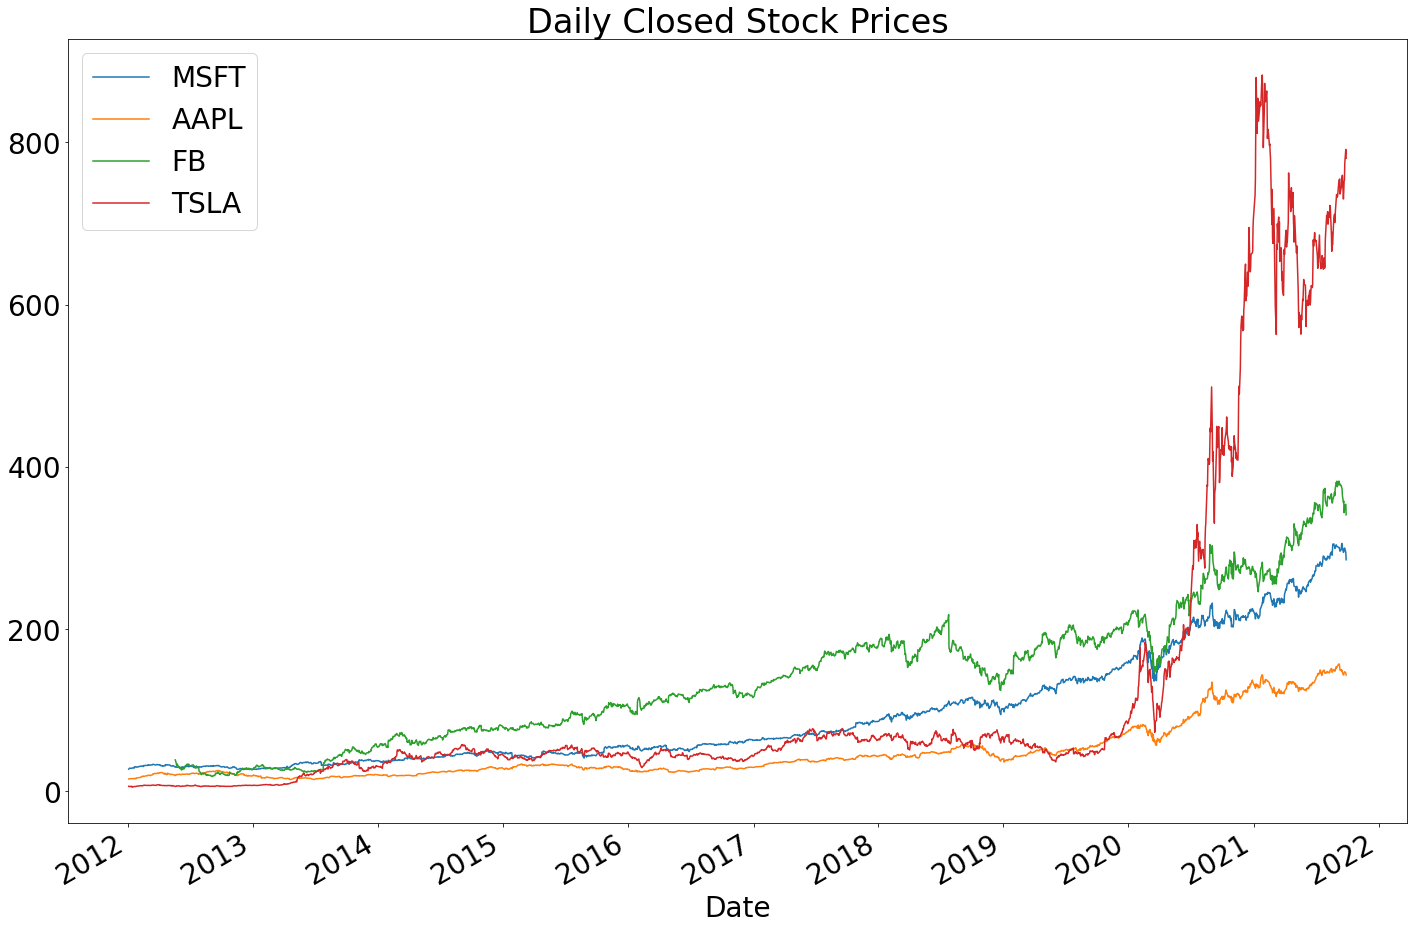

In [44]:
import matplotlib.pyplot as plt

plt.rcParams.update({"font.size": 28})
fig, ax = plt.subplots(figsize = (24, 16))
close_data.plot.line(ax = ax, legend = True)

plt.title("Daily Closed Stock Prices")

## Logging the y-axis to view change in terms of proportion

<ipython-input-49-8b353aeaf372>:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([int(y) if y >= 1 else round(y, 1) for y in y_vals])


[Text(0, 0.1, '0.1'),
 Text(0, 1.0, '1'),
 Text(0, 10.0, '10'),
 Text(0, 100.0, '100'),
 Text(0, 1000.0, '1000'),
 Text(0, 10000.0, '10000')]

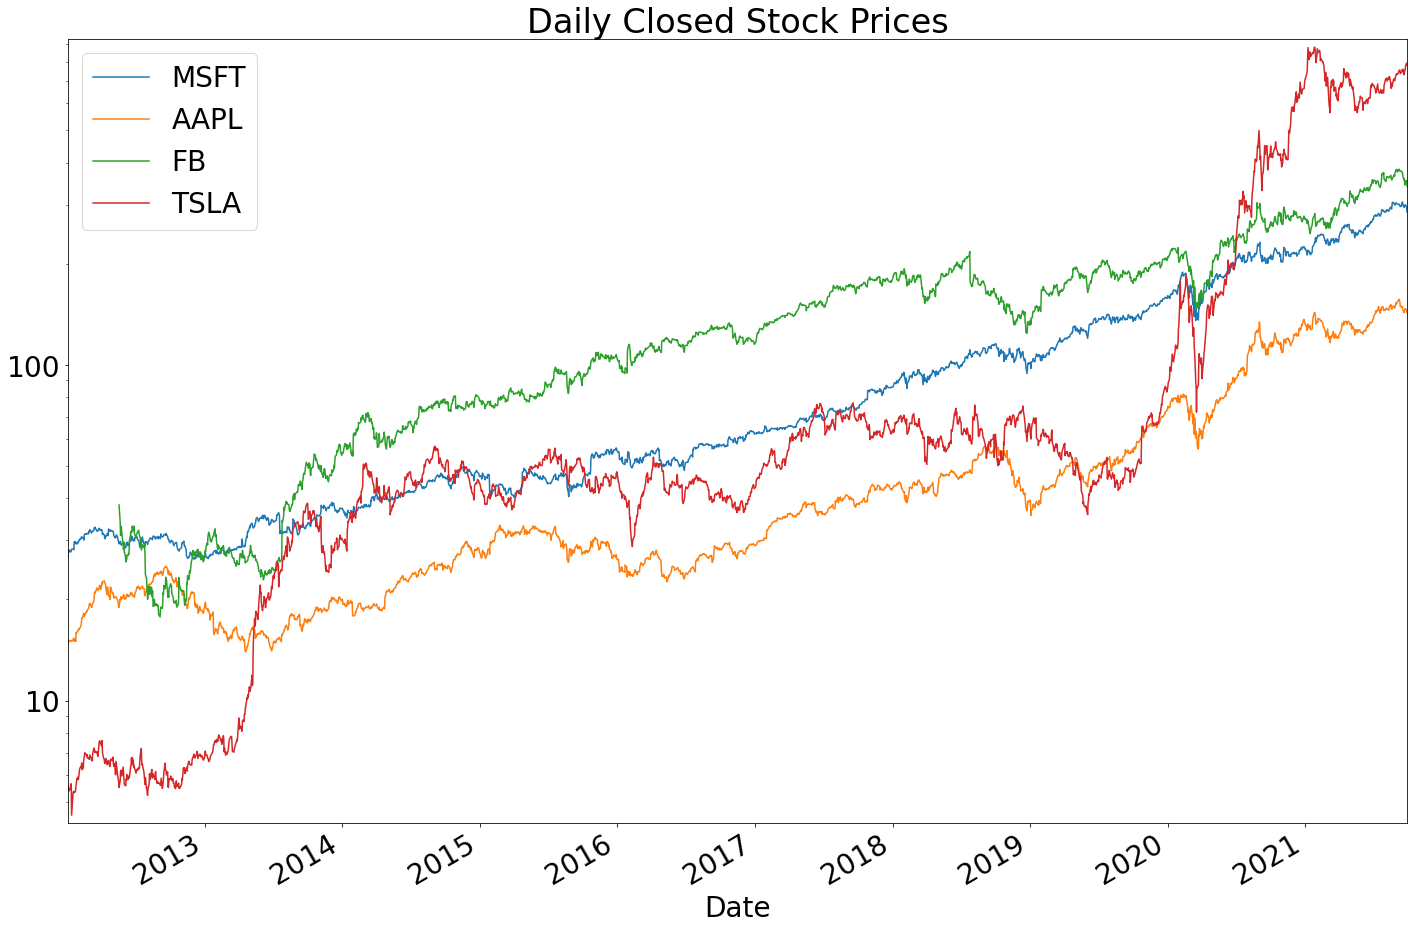

In [49]:
import matplotlib.pyplot as plt

plt.rcParams.update({"font.size": 28})
# Changes the x and y margins to make it look nicer
plt.rcParams['axes.xmargin'] = 0
plt.rcParams['axes.ymargin'] = 0.01

fig, ax = plt.subplots(figsize = (24, 16))
close_data.plot.line(ax = ax, legend = True)

plt.title("Daily Closed Stock Prices")
ax.set_yscale("log")
# Changes y axis from scientific notation to actual values
y_vals = ax.get_yticks()
ax.set_yticklabels([int(y) if y >= 1 else round(y, 1) for y in y_vals])

In [50]:
price_change_data = close_data.pct_change() * 100
price_change_data

,MSFT,AAPL,FB,TSLA
Date,,,,
2012-01-03,NaN,NaN,NaN,NaN
2012-01-04,2.353377,0.537408,NaN,-1.317670
2012-01-05,1.021900,1.110200,NaN,-2.129196
2012-01-06,1.553469,1.045381,NaN,-0.774333
2012-01-09,-1.316261,-0.158618,NaN,1.263468
...,...,...,...,...
2021-09-22,1.282225,1.687244,-3.991837,1.698720
2021-09-23,0.328224,0.671920,0.801259,0.226083
2021-09-24,-0.070100,0.061293,2.023355,2.753304
